### Study of column 'Working professional' or 'Student'

The data shows a different value in depression for people as students or workers, so I cleaned the train to see the differences and decide whether to differentiate the population or not.

In [1]:
# Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Mental_Health = pd.read_csv('Datasheet/Mental_Health_train.csv')

In [3]:
Mental_Health['Work'] = Mental_Health['Working Professional or Student'] #change the name of the column
Mental_Health.drop(columns='Working Professional or Student',axis=1, inplace=True) 
Mental_Health.head(6)

,id,Name,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Work
0,0,Aaradhya,Female,49.0,Ludhiana,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,Working Professional
1,1,Vivan,Male,26.0,Varanasi,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,Working Professional
2,2,Yuvraj,Male,33.0,Visakhapatnam,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,Student
3,3,Yuvraj,Male,22.0,Mumbai,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,Working Professional
4,4,Rhea,Female,30.0,Kanpur,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,Working Professional
5,5,Vani,Female,59.0,Ahmedabad,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0,Working Professional


## Preparation of the df (Mental_Health)
* There are two kinds of people: _Students_ from 18 to 36 years old (20%) and _Workers_ from 18 to 60 years old (80%).
* Also, few of the students work
* The columns 'Academic Pressure' and 'Work Pressure' are similar, but for the two kinds of people. So, I will make a new column, 'Pressure,' with the data of both columns.
* The same for 'Study Satisfaction' and 'Job Satisfaction', join in a new column 'Satisfaction'
* I will drop the columns 'Name', 'Profession', 'CGPA','Sleep Duration','Dietary Habits', and 'Degree'
* The columns 'Gender','Have you ever had suicidal thoughts ?' and 'Family History of Mental Illness' I will change to binary vlaues. 

In [4]:
Mental_Health = Mental_Health.drop(columns = ['Name', 'Profession', 'CGPA','Sleep Duration','Dietary Habits', 'Degree'])
Mental_Health.head(3)

,id,Gender,Age,City,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Work
0,0,Female,49.0,Ludhiana,NaN,5.0,NaN,2.0,No,1.0,2.0,No,0,Working Professional
1,1,Male,26.0,Varanasi,NaN,4.0,NaN,3.0,Yes,7.0,3.0,No,1,Working Professional
2,2,Male,33.0,Visakhapatnam,5.0,NaN,2.0,NaN,Yes,3.0,1.0,No,1,Student


In [5]:
#drop 'Nan' to make the new columns
Mental_Health['Academic Pressure'] = Mental_Health['Academic Pressure'].replace(to_replace=np.nan, value=0)
Mental_Health['Work Pressure'] = Mental_Health['Work Pressure'].replace(to_replace=np.nan, value=0)
Mental_Health['Study Satisfaction'] = Mental_Health['Study Satisfaction'].replace(to_replace=np.nan, value=0)
Mental_Health['Job Satisfaction'] = Mental_Health['Job Satisfaction'].replace(to_replace=np.nan, value=0)
# Female = 1, Male = 0 
Mental_Health['Gender'] = Mental_Health['Gender'].replace(to_replace={'Female': 1, 'Male': 0})
#Yes = 1, No = 0
Mental_Health['Have you ever had suicidal thoughts ?'] = Mental_Health['Have you ever had suicidal thoughts ?'].replace(to_replace={'Yes': 1, 'No': 0})
Mental_Health['Family History of Mental Illness'] = Mental_Health['Family History of Mental Illness'].replace(to_replace={'Yes': 1, 'No': 0})
#Worker=1 Student = 0
# Mental_Health['Work'] = Mental_Health['Work'].replace(to_replace={'Working Professional': 1, 'Student': 0})
Mental_Health.tail(3)

/var/folders/_2/nh5rkkms0rbdwypbjgwb50xh0000gn/T/ipykernel_60682/409694988.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Mental_Health['Gender'] = Mental_Health['Gender'].replace(to_replace={'Female': 1, 'Male': 0})
/var/folders/_2/nh5rkkms0rbdwypbjgwb50xh0000gn/T/ipykernel_60682/409694988.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Mental_Health['Have you ever had suicidal thoughts ?'] = Mental_Health['Have you ever had suicidal thoughts ?'].replace(to_replace={'Yes': 1, 'No': 0})
/var/folders/_2/nh5rkkms0rbdwypbjgw

,id,Gender,Age,City,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Work
140697,140697,1,24.0,Kolkata,0.0,3.0,0.0,1.0,0,4.0,4.0,0,0,Working Professional
140698,140698,1,49.0,Srinagar,0.0,5.0,0.0,2.0,1,10.0,1.0,0,0,Working Professional
140699,140699,0,27.0,Patna,4.0,0.0,1.0,0.0,1,2.0,3.0,1,1,Student


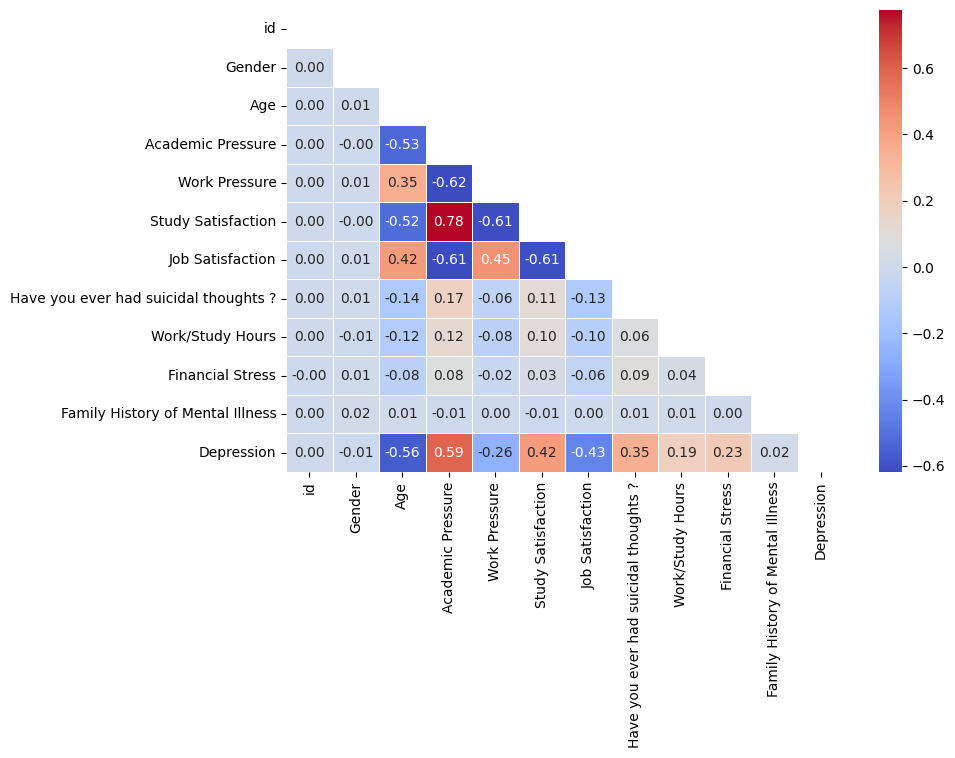

In [6]:
corr = Mental_Health.corr(numeric_only=True)
cmap = sns.diverging_palette(-1, 1, s=100, l=50, n=15, center="dark", as_cmap=True)
plt.figure(figsize=(9, 6))
sns.heatmap(Mental_Health.corr(numeric_only=True), annot=True, fmt='.2f', linewidth=0.5, cmap='coolwarm', mask=np.triu(Mental_Health.corr(numeric_only=True)))
plt.show()

The column depression has a low relationship with all the other columns.
- inverse relationship with 'Age'.
- middle relationship with 'Academic pressure'

I will check the data in a graphical representation.

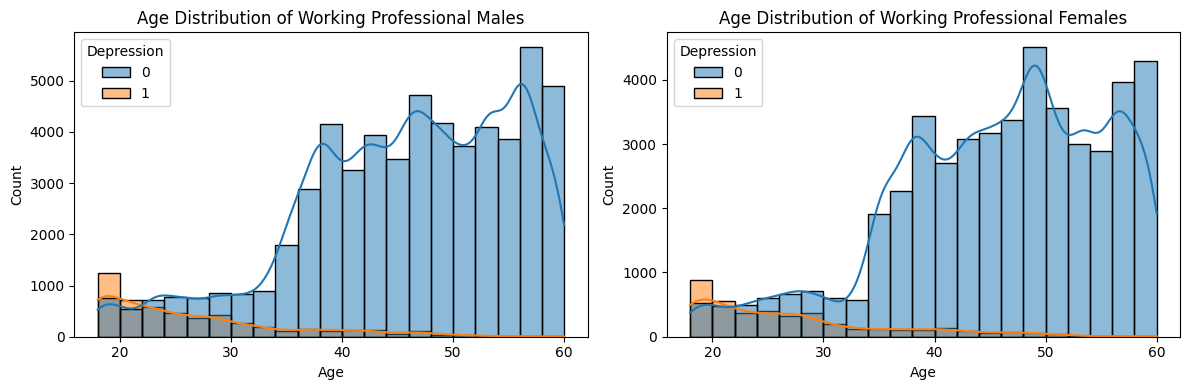

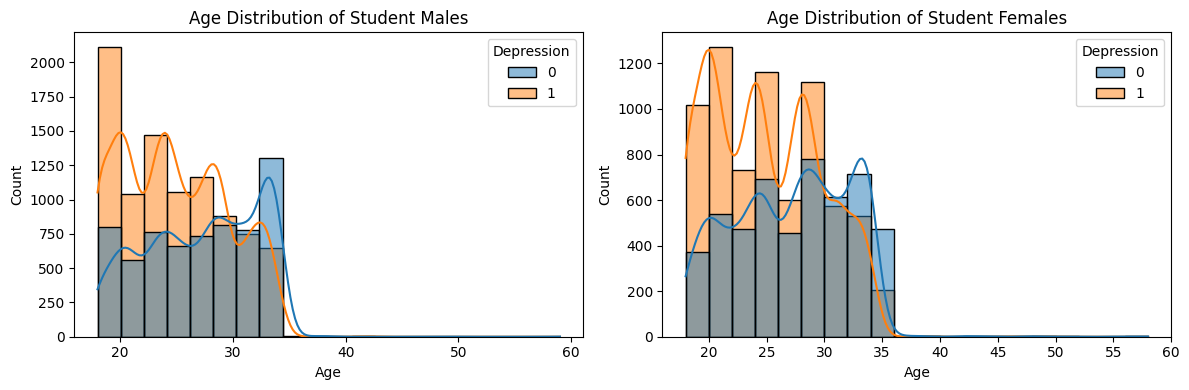

In [7]:
for work in Mental_Health['Work'].unique():
    Work_df = Mental_Health[Mental_Health['Work'] == work]

    # Create separate plots for Workers and Students
    plt.figure(figsize=(12, 4))

    # Plot for Workers
    plt.subplot(1, 2, 1)
    sns.histplot(data=Work_df[Work_df['Gender'] == 0], x='Age', binwidth=2, hue='Depression', kde=True)
    plt.title(f'Age Distribution of {work} Males')

    # Plot for Students
    plt.subplot(1, 2, 2)
    sns.histplot(data=Work_df[Work_df['Gender'] == 1], x='Age', binwidth=2, hue='Depression', kde=True)
    plt.title(f'Age Distribution of {work} Females')

    plt.tight_layout()
    plt.savefig(f'fig/Work_{work}.png')
    plt.show()
    

- There are no differences by gender.
- Depression is lower by the 'Age'
- 'Working professionals have lower depression than 'Students'.
- The students don't show any relation with the age.
- in both populations, the depression starts to reduce at 30 years.

The population of students and workers shows different behaviors in the incidence of depression.

But also, the depression in the Students shows that there are other influences.
